# Black Box

Matriculation number: 2663452m

In [13]:
# Importing libraries and setting default values for plotting paramenters

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 
from scipy import constants as const
import schemdraw as schem
import schemdraw.elements as elm
from schemdraw import dsp

TITLE_SIZE = 20
AXIS_SIZE= 16
ANNOTATE_TITLE = 12
plt.rcParams["font.family"] = "Times New Roman"
%config InlineBackend.figure_format = 'svg'

## Pre-Lab Questions

a) Read labscript and do some revision of the relevant sections from courses, and use textbook to help with understanding.

b)Show that the magnitude of voltage drop over the capacitor can be found by
the following formula:
$$\bigg |{\frac{V_{out}}{V_{in}}}\bigg | = \frac{1}{\sqrt{1+(\omega CR)^2}}$$

Voltage drop over a capcitor in series with a resistor can be derived from: $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{Z_2}{Z_1 +Z_2}\bigg |$$
Where $Z_1$ is the impedance of the resistor and $Z_2$ is the impedance of the capacitor. The impedance of a capacitor is $\frac{1}{j\omega C}$ and the impedance of a resistor is $R$. Substituting in these values to the formula gives $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{\frac{1}{j\omega C}}{R + \frac{1}{j\omega C}}\bigg |$$

Then Multiplying by the complex conjugate 
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{\frac{1}{j\omega C}}{R + \frac{1}{j\omega C}}\bigg | \times - \frac{j\omega C}{j\omega C}$$

$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-\frac{j\omega C}{j\omega C}}{-Rj\omega C + -\frac{j\omega C}{j\omega C}}\bigg | $$

Simplfying the fraction to give:
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-1}{-1 - Rj\omega C}\bigg |$$

Taking the absolute value of the fraction gives: 
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \frac{1}{\sqrt{1+(\omega CR)^2}}$$

c) Calculating the equaivalent formula for an Inductor.

Again starting with the complex impedamce of an inductor and resistor in series:

$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{Z_2}{Z_1 +Z_2}\bigg |$$

Where $Z_1$ is the impedance of the resistor and $Z_2$ is the impedance of the inductor. The impedance of an inductor is $j\omega L$ and the impedance of a resistor is $R$. Substituting in these values to the formula gives $$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{j\omega L}{R + j\omega L}\bigg |$$

Then Multiplying by the complex conjugate
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{j\omega L}{R + j\omega L}\bigg | \times - \frac{\frac{1}{j\omega L}}{\frac{1}{j\omega L}}$$

Givin:
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-\frac{j\omega L}{j\omega L}}{-\frac{R}{j\omega L} + -\frac{j\omega L}{j\omega L}}\bigg | $$

Simplfying the fraction gives:
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \bigg |\frac{-1}{-1 - \frac{R}{j\omega L}}\bigg |$$

And taking the absolute value of the fraction gives: 
$$\bigg |\frac{V_{out}}{V_{in}}\bigg | = \frac{1}{\sqrt{1+\left(\frac{R}{\omega L}\right)^2}}$$

d) When using the potential divider equation for two resistors in series, $$\frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}$$ it is independent of the frequency of the input signal $\omega$, however, in the two formulas derived above the magnitude of the voltage drop for a capacitor and inductor in series with a resistor are dependent on the frequency of the input signal $\omega$.

## Aims

The first aim of this lab is to investigate the values of a resistor, capacitor and inductor in a circuit using a signal generator and an oscilloscope.
The second aim is to build an RLC circuit and calculate the resonant frequency of the circuit.

## Measuring the value of the Resistor in the Black box
To carry out this section it is necessary to build a voltage divider circuit using two resistors in series with R1 being of known value (10 $\Omega$) and R2 being the unknown resistor. The circuit is shown below:

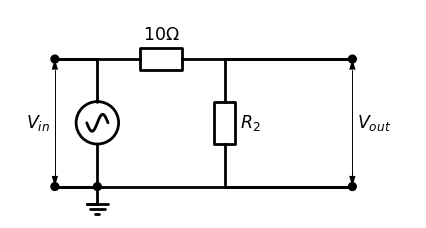

In [82]:
#Drawing a circuit diagram for a potential divider with 2 resistors using the schemdraw library
elm.style(elm.STYLE_IEC)
with schem.Drawing(backend = 'Matplotlib') as d:
    d += elm.SourceSin().up()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{in}$', loc='top')
    d += elm.Line().right().length(1)
    d += elm.Resistor().right().label(r'$10\Omega$')
    d += elm.Line().right()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{out}$', loc='bottom')
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Resistor().down().label(r'$R_2$', loc='bottom')
    d += elm.Line().right()
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Ground()



    

Using this circuit the voltage in and voltage out can be measured, and the value of R2 can be calculated using the formula: $$\frac{V_{out}}{V_{in}} = \frac{R_2}{R_1 + R_2}$$ and rearranging to give: $$R_2 = \left(\frac{V_{in}}{V_{out}} -1\right) \times R_1$$

In [90]:
def r_2(r_1, v_in, v_out):
    return r_1 * ((v_in / v_out)-1)

R1 = 10 #Ohms
Vin = 7.4 #Volts
Vout = 0.8 #Volts

print('The resistance of the unknown resistor R_2 is = ', r_2(R1, Vin, Vout), 'Ohms')

The resistance of the unknown resistor R_2 is =  82.5 Ohms


## Measuring the value of the Capacitor in the Black box
To carry out this section it is necessary to build a voltage divider circuit using the resistor in the black box that has just been determined and the capacitor in series with Z1 being of known value (82.5 $\Omega$) and Z2 being the unknown Capacitor. The circuit is shown below:

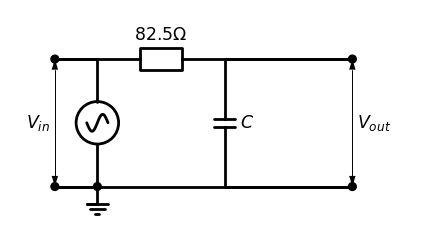

In [93]:
#Drawing a circuit diagram for a potential divider with 2 resistors using the schemdraw library
elm.style(elm.STYLE_IEC)
with schem.Drawing(backend = 'Matplotlib') as d:
    d += elm.SourceSin().up()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{in}$', loc='top')
    d += elm.Line().right().length(1)
    d += elm.Resistor().right().label(r'$82.5\Omega$')
    d += elm.Line().right()
    d += elm.Arrow(double = True).linewidth(0.7).down().hold().label(r'$V_{out}$', loc='bottom')
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Capacitor().down().label(r'$C$', loc='bottom')
    d += elm.Line().right()
    d += elm.Dot()
    d += elm.Line().left()
    d += elm.Line().left()
    d += elm.Line().left().length(1)
    d += elm.Dot()
    d += elm.Line().right().length(1)
    d += elm.Dot()
    d += elm.Ground()
